In [1]:
# For Colab
# !git clone https://github.com/trevor-yu-087/syde-599-f23-tutorial.git
# DATA_PATH = "syde-599-f23-tutorial/data/logistic-regression-data.pkl"

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
with open("data/logistic-regression-data.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['training_x', 'training_y', 'validation_x', 'validation_y'])

# Section 1: Logistic Regression with Scikit-Learn
In this tutorial, we will use scikit-learn Linear Regression to do binary classification. The goal is again to get familiar with the typical machine learning workflow.

In [5]:
# By convention, 2D data (matrices) uses capital letters, while 1D data (vectors) uses lower case letters
X_train = data["training_x"]
y_train = data["training_y"]
X_val = data["validation_x"]
y_val = data["validation_y"]

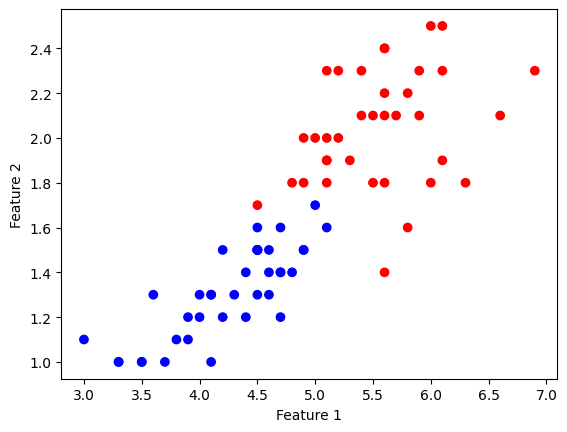

In [6]:
# TODO: Plot features at index 2 and 3
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

[Scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [7]:
from sklearn.linear_model import LogisticRegression
# TODO: Instantiate model
clf = LogisticRegression()

In [8]:
# TODO: Fit model on training data
clf.fit(X_train, y_train)

LogisticRegression()

In [9]:
# TODO: Score model on the training and validation sets
train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_val, y_val)

print(f"Training accuracy: {train_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")

Training accuracy: 94.67%
Validation accuracy: 92.00%


In [10]:
# TODO: Get the probabilities for class 0 and class 1
y_hat = clf.predict_proba(X_train)
y_hat

array([[0.76571008, 0.23428992],
       [0.03807589, 0.96192411],
       [0.69069949, 0.30930051],
       [0.00828769, 0.99171231],
       [0.06775818, 0.93224182],
       [0.02522851, 0.97477149],
       [0.79628948, 0.20371052],
       [0.4505042 , 0.5494958 ],
       [0.03493644, 0.96506356],
       [0.12822052, 0.87177948],
       [0.12226014, 0.87773986],
       [0.24500328, 0.75499672],
       [0.06583504, 0.93416496],
       [0.77271386, 0.22728614],
       [0.99475053, 0.00524947],
       [0.980599  , 0.019401  ],
       [0.60895504, 0.39104496],
       [0.93092402, 0.06907598],
       [0.41005703, 0.58994297],
       [0.86877299, 0.13122701],
       [0.99480335, 0.00519665],
       [0.0995938 , 0.9004062 ],
       [0.94864129, 0.05135871],
       [0.2930718 , 0.7069282 ],
       [0.94638977, 0.05361023],
       [0.99724104, 0.00275896],
       [0.71764081, 0.28235919],
       [0.31325143, 0.68674857],
       [0.05300085, 0.94699915],
       [0.51288567, 0.48711433],
       [0.

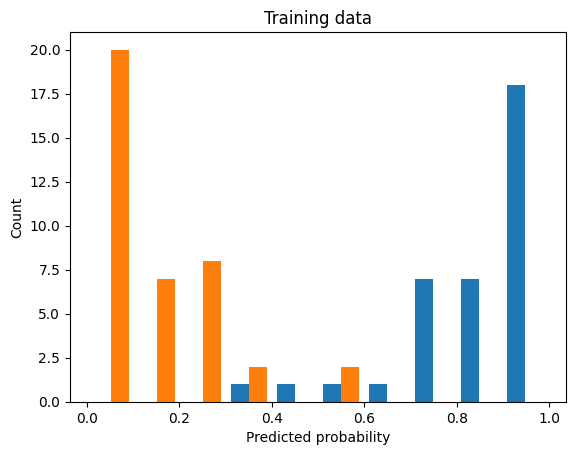

In [11]:
# TODO: Plot the class 0 probabilities against the class 1 probabilities

probs = y_hat[:,1]
true_probs = probs[y_train == 1]
false_probs = probs[y_train == 0]

plt.hist([true_probs, false_probs], bins=10)
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('Training data')
plt.show()

In [12]:
# TODO: Plot the probabilities for the validation data
y_hat_val = clf.predict_proba(X_val)

probs_val = y_hat_val[:,1]
true_probs_val = probs_val[y_val == 1]
false_probs_val = probs_val[y_val == 0]

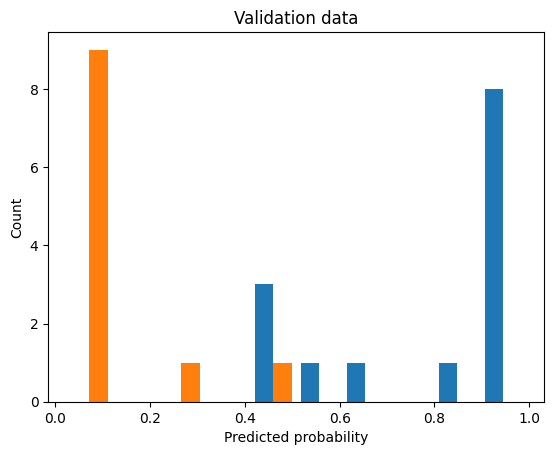

In [13]:
plt.hist([true_probs_val, false_probs_val], bins=10)
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('Validation data')
plt.show()

# Section 2: Logistic Regression in Torch

This section is optional, but provided to get a sense of how torch can be used to the same kind of model, but with more upfront work. If you have familiarity with torch, try to code up logistic regression on your own!

In [14]:
from torch import nn
from sklearn.metrics import accuracy_score

class LogReg(nn.Module):
    def __init__(self, num_features=2):
        super().__init__()
         # TODO: Setup linear layer for the model
        self.linear = nn.Linear(num_features, 1)

    def forward(self, x):
        # TODO: Apply logistic regression model in forward
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

In [15]:
# Must convert data to torch FloatTensor for neural networks
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.astype(np.float32)).unsqueeze(-1)

In [16]:
# TODO: Setup loss function for logistic regression
loss_function = nn.BCELoss()
#####
NUM_STEPS = 200
model = LogReg(X_train.shape[-1])
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [17]:
# TODO: Complete the training loop, pass all the training data each step
losses = []
accs = []

for i in range(NUM_STEPS):
    optimizer.zero_grad()
    y_hat = model(X_train)
    loss = loss_function(y_hat, y_train)
    loss.backward()
    acc = accuracy_score(torch.round(y_hat.detach()), y_train)
    accs.append(acc)
    losses.append(loss.item())
    if i % 10 == 0:
        print(f"BCE Loss at epoch {i}: {loss.item():.3f}")
        print(f"Accuracy score at epoch {i}: {acc:.3f}")
    optimizer.step()

BCE Loss at epoch 0: 0.836
Accuracy score at epoch 0: 0.520
BCE Loss at epoch 10: 0.683
Accuracy score at epoch 10: 0.600
BCE Loss at epoch 20: 0.639
Accuracy score at epoch 20: 0.920
BCE Loss at epoch 30: 0.603
Accuracy score at epoch 30: 0.920
BCE Loss at epoch 40: 0.572
Accuracy score at epoch 40: 0.933
BCE Loss at epoch 50: 0.543
Accuracy score at epoch 50: 0.947
BCE Loss at epoch 60: 0.517
Accuracy score at epoch 60: 0.960
BCE Loss at epoch 70: 0.494
Accuracy score at epoch 70: 0.960
BCE Loss at epoch 80: 0.473
Accuracy score at epoch 80: 0.960
BCE Loss at epoch 90: 0.454
Accuracy score at epoch 90: 0.960
BCE Loss at epoch 100: 0.437
Accuracy score at epoch 100: 0.960
BCE Loss at epoch 110: 0.421
Accuracy score at epoch 110: 0.973
BCE Loss at epoch 120: 0.407
Accuracy score at epoch 120: 0.973
BCE Loss at epoch 130: 0.394
Accuracy score at epoch 130: 0.987
BCE Loss at epoch 140: 0.382
Accuracy score at epoch 140: 0.987
BCE Loss at epoch 150: 0.370
Accuracy score at epoch 150: 0.98

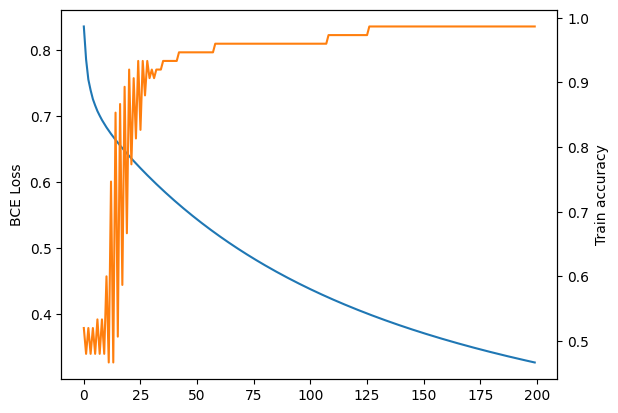

In [18]:
plt.plot(losses)
plt.ylabel("BCE Loss")
plt.twinx()
plt.plot(accs, c="C1")
plt.ylabel("Train accuracy")
plt.show()